In [21]:
# Import some useful libraries
import serial, time
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]

In [22]:
ser = serial.Serial('COM6', 115200) # Usually ACM0, changes with restarts


In [23]:
%%time
r = ser.read_all() # clear serial buffer

# Start a conversion
ser.write(b'c')
while ser.in_waiting < 1:
    pass # wait for a response
time.sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to
r = ser.read_all()
print(r) # Prints the time

# Get the values
ser.write(b'p') # Print DMA buffer
while ser.in_waiting < 1:
    pass # wait for a response

a = []
i = 0
while True:
    if ser.in_waiting < 5:
        time.sleep(0.005) # Wait and check again
        if ser.in_waiting < 5:
            break
    b = ser.readline()
    a.append(b)
    i += 1
    
print(len(a), i) # Should be 10000 readings

b'Conversion complete in 99996 us\n'
6840 6840
Wall time: 3.89 s


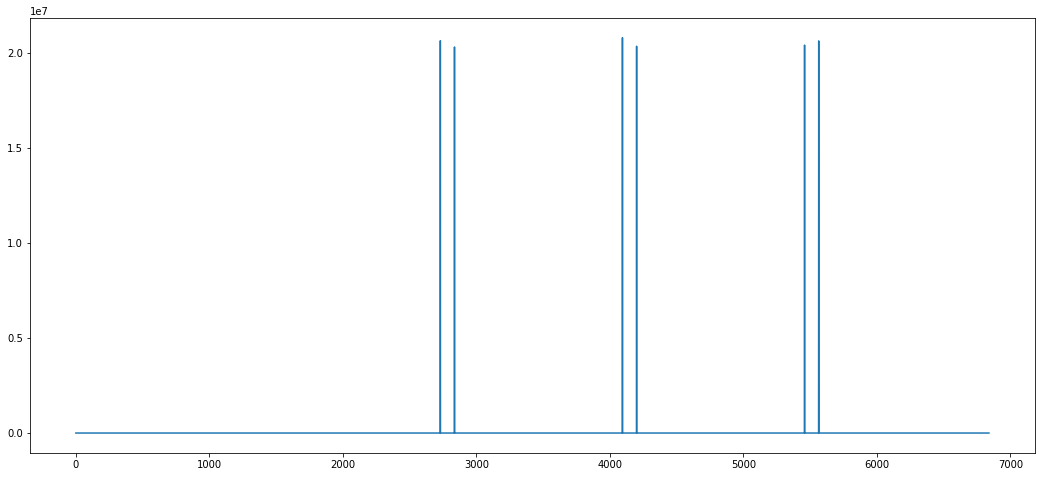

In [24]:
plt.plot([int(n) for n in a]) # microphone heard me whistling